In [30]:
import sys
import os
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import openpolicedata as opd

In [2]:
# Query for the entire table of available data
datasets = opd.datasets_query()
datasets.head()

,State,SourceName,Jurisdiction,TableType,Year,Description,DataType,URL,date_field,dataset_id,jurisdiction_field
0,Arizona,Gilbert,Gilbert,STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
1,Arizona,Mesa,Mesa,STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
2,Arizona,State Patrol,State Patrol,STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
3,Arkansas,Little Rock,Little Rock,TRAFFIC STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>
4,California,Anaheim,Anaheim,TRAFFIC STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>


In [3]:
# Query for all available datasets from Maryland
df = opd.datasets_query(state="Virginia")
df

,State,SourceName,Jurisdiction,TableType,Year,Description,DataType,URL,date_field,dataset_id,jurisdiction_field
93,Virginia,Fairfax County,Fairfax County,ARRESTS,2016,Total arrest charges made by Fairfax County Of...,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,ArrestDate,<NA>,<NA>
94,Virginia,Fairfax County,Fairfax County,ARRESTS,2017,Total arrest charges made by Fairfax County Of...,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,ArrestDate,<NA>,<NA>
95,Virginia,Fairfax County,Fairfax County,ARRESTS,2018,Total arrest charges made by Fairfax County Of...,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,ArrestDate,<NA>,<NA>
96,Virginia,Fairfax County,Fairfax County,ARRESTS,2019,Total arrest charges made by Fairfax County Of...,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,ArrestDate,<NA>,<NA>
97,Virginia,Fairfax County,Fairfax County,ARRESTS,2020,Total arrest charges made by Fairfax County Of...,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,ArrestDate,<NA>,<NA>
98,Virginia,Fairfax County,Fairfax County,ARRESTS,2021,Total arrest charges made by Fairfax County Of...,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,ArrestDate,<NA>,<NA>
99,Virginia,Fairfax County,Fairfax County,TRAFFIC CITATIONS,2019,Traffic Citations issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,tc_date,<NA>,<NA>
100,Virginia,Fairfax County,Fairfax County,TRAFFIC CITATIONS,2020,Traffic Citations issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,tc_date,<NA>,<NA>
101,Virginia,Fairfax County,Fairfax County,TRAFFIC WARNINGS,2019,Traffic Warnings issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,actdate,<NA>,<NA>
102,Virginia,Fairfax County,Fairfax County,TRAFFIC WARNINGS,2020,Traffic Warnings issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,actdate,<NA>,<NA>


In [4]:
# Query for all stops data containing both traffic and investigatory stops in Virginia
df = opd.datasets_query(table_type=opd.TableTypes.STOPS, state="Virginia")
df.head()

,State,SourceName,Jurisdiction,TableType,Year,Description,DataType,URL,date_field,dataset_id,jurisdiction_field
104,Virginia,Virginia Community Policing Act,MULTI,STOPS,MULTI,A data collection consisting of all traffic an...,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name


In [5]:
# To access the data, create a source using a Source Name (usually a police department name). There is an optional state input to clarify ambiguities.
# Create data source for the Virginia Community Policing Act

src = opd.Source(source_name="Virginia Community Policing Act", state="Virginia")
src.datasets

,State,SourceName,Jurisdiction,TableType,Year,Description,DataType,URL,date_field,dataset_id,jurisdiction_field
104,Virginia,Virginia Community Policing Act,MULTI,STOPS,MULTI,A data collection consisting of all traffic an...,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name


In [6]:
# Find out what years are available from the stops table

years = src.get_years(table_type="STOPS")
print(years)

[2020, 2021, 2022]


In [22]:
# Find out what jurisdictions are contained in the stops table that containt the word "Arlington"
jurisdictions = src.get_jurisdictions(partial_name="Fairfax")
print(jurisdictions)

['Fairfax City Police', 'Fairfax County Police Department', "Fairfax County Sheriff's Office"]


In [23]:
# Load data from the source for the Arlington County Police Department in 2021
jurisdiction = "Fairfax County Police Department"
t = src.load_from_url(year=2021, table_type=opd.TableTypes.STOPS, jurisdiction_filter=jurisdiction)
df = t.table.copy()
len(df)

15255

In [24]:
# Show the first 5 rows of the table
df.head(n=5)

,incident_date,agency_name,jurisdiction,reason_for_stop,race,ethnicity,age,gender,action_taken,violation_type,specific_violation,person_searched,vehicle_searched,additional_arrest,virginia_crime_code,person_type,english_speaking,physical_force_by_officer,physical_force_by_subject
0,2021-01-01,Fairfax County Police Department,FAIRFAX CO,CALLS FOR SERVICE,WHITE,NON-HISPANIC,20,MALE,ARREST,COMMONWEALTH,5/1/2001,YES,NO,NO,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,Fairfax County Police Department,FAIRFAX CO,TERRY STOP,BLACK OR AFRICAN AMERICAN,HISPANIC,32,MALE,ARREST,COMMONWEALTH,18.2-250(A)(a),YES,NO,NO,NAR3022F5,NaN,NaN,NaN,NaN
2,2021-01-01,Fairfax County Police Department,FAIRFAX CO,CALLS FOR SERVICE,WHITE,HISPANIC,32,MALE,ARREST,LOCAL,18.2-266,YES,NO,NO,DWI5444M1,NaN,NaN,NaN,NaN
3,2021-01-01,Fairfax County Police Department,FAIRFAX CO,TRAFFIC VIOLATION,BLACK OR AFRICAN AMERICAN,NON-HISPANIC,23,MALE,ARREST,COMMONWEALTH,18.2-266,YES,YES,NO,DWI5413M1,NaN,NaN,NaN,NaN
4,2021-01-01,Fairfax County Police Department,FAIRFAX CO,TRAFFIC VIOLATION,WHITE,NON-HISPANIC,27,MALE,ARREST,LOCAL,18.2-266,YES,YES,NO,DWI5413M1,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index(['incident_date', 'agency_name', 'jurisdiction', 'reason_for_stop',
       'race', 'ethnicity', 'age', 'gender', 'action_taken', 'violation_type',
       'specific_violation', 'person_searched', 'vehicle_searched',
       'additional_arrest', 'person_type', 'english_speaking',
       'virginia_crime_code', 'physical_force_by_officer',
       'physical_force_by_subject', 'residency', 'race_eth'],
      dtype='object')

In [25]:
# Create a new column that combines race and ethnicity
df["race_eth"] = df["race"]
df.loc[df["ethnicity"] == "HISPANIC", "race_eth"] = "HISPANIC"
df.loc[df["ethnicity"] == "UNKNOWN", "race_eth"] = "UNKNOWN"

df["race_eth"].value_counts()

WHITE                        5987
HISPANIC                     3224
BLACK OR AFRICAN AMERICAN    2812
UNKNOWN                      2094
ASIAN/PACIFIC ISLANDER       1080
AMERICAN INDIAN                58
Name: race_eth, dtype: int64

In [47]:
import numpy as np
searches = df.groupby(["person_searched","race_eth"]).size().unstack("race_eth")
searches = pd.DataFrame([searches.loc["YES"], np.round(searches.loc["YES"]/searches.sum()*100,1)], index=["Count", "Percentage"])
searches = searches.transpose()
searches.dropna(inplace=True)
searches["Count"] = searches["Count"].astype(int)
searches

,Count,Percentage
race_eth,,
AMERICAN INDIAN,1,1.7
ASIAN/PACIFIC ISLANDER,49,4.5
BLACK OR AFRICAN AMERICAN,320,11.4
HISPANIC,456,14.1
UNKNOWN,5,0.2
WHITE,297,5.0


Text(0.5, 0, 'Percentage')

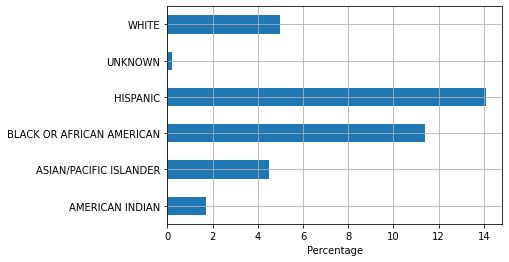

In [56]:
ax = searches.plot.barh(y="Percentage", grid=True, legend=False)
ax.set_ylabel("")
ax.set_xlabel("Percentage")